In [1]:
## Import modules as needed
import pandas as pd
import numpy as np
import altair as alt
import random

## enabling for altair
alt.enable_mime_rendering()

#Some basic global variables
NUMBER_OF_TRAINING = 100

We first create the training examples. To do so we need to create
1. the true linear seperator ($w^*$)
2. generate a list of points ($x$) and its class ($y=h(x)$).

Note:
We are working in a 2-dimensional space but keep in mind that $x=(1, x_1,x_2)$. The form of the true linear seperator is $[w_0, w_1, w_2]$. And $h(x)=sign(w^Tx)$. If we were to show this as $y = ax + b$ this will be presented in $w_0, w_1, w_2$ as $y=-\frac{w_1}{w_2}x-\frac{w_o}{w_2}$


In [8]:
w_star = np.matrix([((random.random()-0.5) * 10) for i in range(3)]).T
w_star

matrix([[-3.40082265],
        [-3.82370481],
        [ 3.21264163]])

In [9]:
training_x = np.matrix([[1,
                         (random.random() - 0.5) * 100,
                         (random.random() - 0.5) * 100] 
                        for i in range(NUMBER_OF_TRAINING)]).T
training_y = np.sign(w_star.T * training_x)

training_x

matrix([[  1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   

Now we set up 100 random training_x and calculate the training_y

In [10]:
training_x = np.matrix([[1,
                         (random.random() - 0.5) * 100,
                         (random.random() - 0.5) * 100] 
                        for i in range(NUMBER_OF_TRAINING)]).T
training_y = np.sign(w_star.T * training_x)

training_df = pd.DataFrame(np.column_stack((training_x[1:3].T, training_y.T)), columns=["x","y","class"])
training_df.head()

,x,y,class
0,-18.290559,-12.045243,1.0
1,-11.609291,-47.441941,-1.0
2,46.471690,36.088964,-1.0
3,26.669729,-16.535514,-1.0
4,-13.784718,-31.218799,-1.0


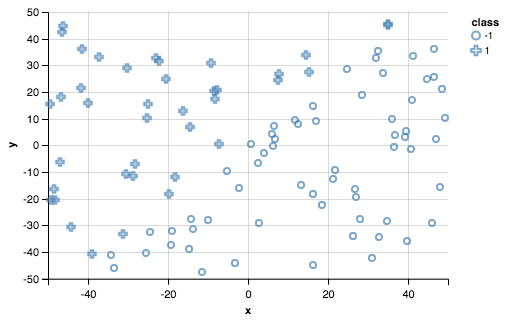

In [11]:
alt.Chart(training_df).mark_point().encode(
    x='x',
    y='y',
    shape="class"
)

Altair is a great graphing package for python that handles high level statistical graphing. Unfortuantely, I haven't figured out how to layer the graph with the actual dividor ($w^*$).

Now for the actual perceptron learning algo (PLA).


In [12]:
# intial guess
w_trained = np.matrix([0 for i in range(2+1)]).T

counter = 0

while True:
    counter += 1
    if counter % 1000 == 0: print(counter)
    for i in range(NUMBER_OF_TRAINING):
        if np.sign(training_x.T[i] * w_trained) != training_y.T[i]:
#             print("########", i)
#             print((training_x.T[i].T * training_y.T[2]))
            w_trained = w_trained + (training_x.T[i].T * training_y.T[i])
            break
        else:
            continue
    if (np.sign(w_trained.T * training_x) == training_y).all():
        break

w_trained

# write something to normalize the array
# also make sure to do the same to w_Star at teh beginngin

matrix([[ -15.        ],
        [-204.06566256],
        [ 170.2511388 ]])